# PYTHON PARA GESTIÓN DE TESORERÍA

# Ejercicios de evaluación

Enviar notebook **NombreAlumno.ipynb** al e-mail **frasamo@doctor.upv.es**

Fecha tope envío 22 diciembre 2017.

** Ejercicio 1 (Numpy y Pandas)** Crea una vector **x** con 20 valores aleatorios enteros entre -10 y 10, ambos inclusive. Convierte el vector en una  matriz **M** de 5 filas y 4 columnas. Transforma la matriz en un DataFrame llamado **df** con los siguientes nombres de columnas Col1, Col2, Col3 y Col4. Crea un rango de fechas que empiece el 2018-01-01 de 5 periodos y frecuencia díaria. Utiliza este rango de fechas como índice del DataFrame. Finalmente añade una columna nueva Col5 que contenga la suma de las columnas Col3 y Col4. 

In [1]:
import numpy as np
import pandas as pd

In [9]:
x = np.random.randint(-10, 11, size=20)
x

array([ 10,  -2,  10,  -2,  -5,   4,  10,   9,   1,   3,   7,  -5,   7,
         4,  -8,  -3, -10,   0,   1,   9])

In [10]:
M = x.reshape((5,4))
M

array([[ 10,  -2,  10,  -2],
       [ -5,   4,  10,   9],
       [  1,   3,   7,  -5],
       [  7,   4,  -8,  -3],
       [-10,   0,   1,   9]])

In [11]:
df = pd.DataFrame(M, columns=['Col1', 'Col2', 'Col3', 'Col4'])
df

,Col1,Col2,Col3,Col4
0,10,-2,10,-2
1,-5,4,10,9
2,1,3,7,-5
3,7,4,-8,-3
4,-10,0,1,9


In [13]:
fechas = pd.date_range('2018-01-01', periods=5, freq='D')
fechas

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05'],
              dtype='datetime64[ns]', freq='D')

In [14]:
df.index = fechas
df

,Col1,Col2,Col3,Col4
2018-01-01,10,-2,10,-2
2018-01-02,-5,4,10,9
2018-01-03,1,3,7,-5
2018-01-04,7,4,-8,-3
2018-01-05,-10,0,1,9


In [16]:
df['Col5'] = df['Col3'] + df['Col4']
df

,Col1,Col2,Col3,Col4,Col5
2018-01-01,10,-2,10,-2,8
2018-01-02,-5,4,10,9,19
2018-01-03,1,3,7,-5,2
2018-01-04,7,4,-8,-3,-11
2018-01-05,-10,0,1,9,10


**Ejercicio 2 (Modelo Miller-Orr).** Una variante del modelo de Miller-Orr basado en tres niveles propone ejecutar acciones de control al final del día cuando el flujo de caja $f_t$ ya es conocido de acuerdo con la ecuación:

\begin{equation}
x_t=\left\{\begin{array}{lll}Z-b_{t-1}-f_t & \mbox{if} & b_{t-1} + f_t > H \\ 0 &\mbox{if} & L \leq b_{t-1} + f_t \leq H  \\Z-b_{t-1}-f_t & \mbox{if} & b_{t-1} + f_t < L \end{array}\right.
\end{equation}

Esta estrategia supone que cuando el saldo alcanza el nivel de control superior $H$ o el nivel de control inferior $L$, se ejecuta una acción de control para llevar el saldo al nivel $Z$. Esta acción de control se toma al final de cada instante de tiempo $t$ y el saldo $b_t$ se actualiza según la ecuación:

\begin{equation}
b_{t} = b_{t-1} + x_t + f_t
\end{equation}

Por precaución, podemos fijar un límite inferior $L$ que sea proporcional a la desviación típica $\sigma$ del flujo de caja considerado 

\begin{equation}
L = \xi \cdot \sigma
\end{equation}

donde $\xi$ es un parámetro que refleja la aversión al riesgo del tesorero. Cuanto mayor es $\xi$, más alto será el límite inferior $L$ y por tanto más conservador. Un valor típico de $\xi$ es 2 o 3 de manera que exista una probabilidad de 0.95 o 0.99 respectivamente de que el saldo pueda pasar a ser negativo desde $L$ al añadir un flujo de caja aleatorio normal de media cero y desviación típica $\sigma$. A partir de $L$, podemos fijar los límites $Z$ and $H$ según las fórmulas propuestas por Miller-Orr:

\begin{equation}
Z=L+\left(\frac{3 \cdot \gamma_0 \cdot \sigma^2}{4 \cdot v}\right)^{1/3}
\end{equation}

\begin{equation}
H=3 \cdot Z-2 \cdot L
\end{equation}

donde $\gamma_0$ es un coste fijo de transacción y $v$ es el coste de mantenimiento (o de oportunidad) por mantener efectivo en la cuenta.

Dado un flujo de caja aleatorio normal con media cero y desviación típica 1 millón de euros, un coste de mantenimiento por día de $v = 0.02$ %, un coste fijo de transacción $\gamma_0= 5$ euros tanto para transacciones positivas y negativas y un valor de $\xi = 2$ para el parámetro de riesgo:

a) Calcular los límites de control **H**, **Z**, y **L**.

b) Genera un flujo de caja aleatorio **flow** con media cero y desviación típica 1 millón de euros para un horizonte de 100 días.

c) Define una función **transfer** para obtener la acción $x_t$ a partir de **H**, **Z**, y **L** para un saldo previo $b_{t-1}$ y un flujo de caja $f_t$ para el instante $t$.

d) Utiliza la función **transfer** para obtener la secuencia de acciones de control $X$ y el saldo resultante $B$ para un horizonte de 100 días partiendo de un saldo inicial igual a $Z$.

e) Representa gráficamente el saldo $B$ resultante de aplicar las acciones de control $X$ mediante una línea de puntos color negro. Añade la etiqueta "Días" al eje x y la etiqueta "Saldo" al eje y.

In [1]:
# a) Cálculo de los límites H, Z, y L

sigma = 1000000
xi = 2
g0 = 5
v = 0.0002
L = xi * sigma
Z = L + ((3 * g0 * sigma ** 2)/(4 * v)) ** (1/3)  
H = 3 * Z - 2 * L
H, Z, L

(2796993.926886957, 2265664.6422956525, 2000000)

In [19]:
# b) Flujo de caja aleatorio con media cero y sigma 1000000
flow = np.random.normal(0, sigma, size=100)

In [20]:
# c) Definición de transfer a partir de saldo previo y flujo de caja
def transfer(h, z, l, b0, f):
    if b0 + f > h or b0 + f < l:
        x = z - b0 - f
    else:
        x = 0
    return(x)

In [21]:
# d) Obetener secuencia X y saldo B
X = []
B = []
inibal = Z
for elem in flow:
    x = transfer(H, Z, L, inibal, elem)
    X.append(x)
    bal = inibal + x + elem
    B.append(bal)
    inibal = bal

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

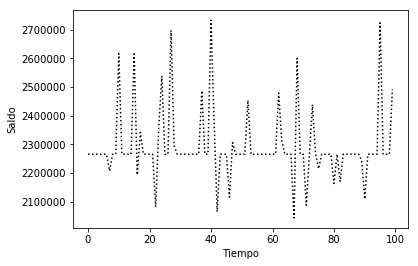

In [25]:
# e) Representar saldo B
t = range(100)
plt.plot(t, B, 'k:')
plt.xlabel('Tiempo')
plt.ylabel('Saldo')
plt.show()

**Ejercicio 3 (Propuesta).** Propón un ejercicio para aplicar alguno de los conceptos explicados en las sesiones de Gestión de Tesorería con Python incluyendo las siguientes características:

- La definición de una función
- La visualización mediante un gráfico del resultado